<a href="https://colab.research.google.com/github/vitorpohlenz/AudioAnalisysML/blob/segmentation/AudioClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone and install from github.

Cloning repository to have data in local folder.

In [5]:
!git clone https://github.com/vitorpohlenz/AudioAnalisysML.git

Cloning into 'AudioAnalisysML'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


[pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis)

In [6]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git
!pip install -r pyAudioAnalysis/requirements.txt
!pip install -e pyAudioAnalysis

Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 2575, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 2575 (delta 18), reused 8 (delta 3), pack-reused 2534
Receiving objects: 100% (2575/2575), 156.05 MiB | 26.53 MiB/s, done.
Resolving deltas: 100% (1579/1579), done.
     |████████████████████████████████| 13.1 MB 73 kB/s 
     |████████████████████████████████| 81 kB 9.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 146 kB 56.8 MB/s 
     |████████████████████████████████| 145 kB 49.7 MB/s 
     |████████████████████████████████| 6.8 MB 56.0 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 7.1 MB 53.0 MB/s 
  Created wheel for simplejson: filename=simplejson-3.16.0-cp37-cp37m-linux_x86_64.whl size=114884 sha256=334d760b4f98652e0dde4cdd522dccca2d9fd617ec41d328ad8e80b25990874d
  Stored in directory

Obtaining file:///content/pyAudioAnalysis
  Running setup.py develop for pyAudioAnalysis


# Libraries

In [27]:
# Common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import os

# Audio libraries
# import pyAudioAnalysis
from pyAudioAnalysis import audioSegmentation
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import ShortTermFeatures

# Signal processing libraries
from scipy.signal import find_peaks

# Set seed
seed = 9
np.random.seed(seed)

Dark theme better visualization.

In [2]:
# Plot's Layout
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize = [12,8])

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [23]:
from scipy.io.wavfile import write


# Functions

In [3]:
def RMS(array):
    """
    RMS value from 1D array.

    Parameters
    ----------
    array : numpy.array (1D numeric)
        Array to get rms value.

    Returns
    -------
    rms : float
        Valor RMS.

    """
    rms = np.sqrt(np.mean(np.power(array,2)))
    return rms

# Audio Segmentation

In [4]:
wavPath = 'AudioAnalisysML/data/aluminumBaseballBatPings.wav'

In [5]:
# sample frequency, samples(quantizied)
[fs, x] = aIO.read_audio_file(wavPath)
RMS(x)

68.01532232106516

In [24]:
fs

44100

In [6]:
# audioSegmentation.silence_removal(signal=x, 
#                                   sampling_rate=fs, st_win= 0.020,st_step =  0.020, smooth_window = 1.0, weight = 0.3, plot = True)

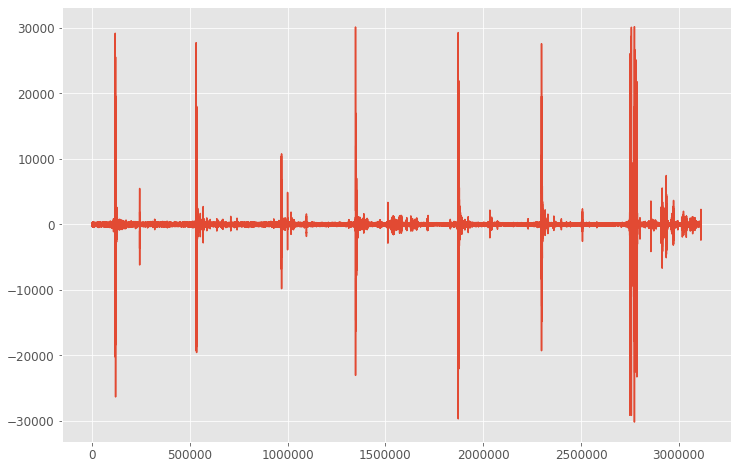

In [7]:
# Raw signal
plt.plot(x)

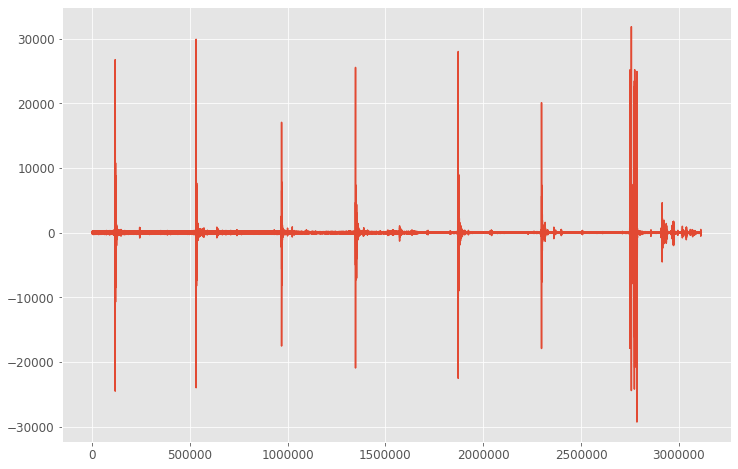

In [8]:
# Diff of signal
plt.plot(x[1:]-x[:-1])

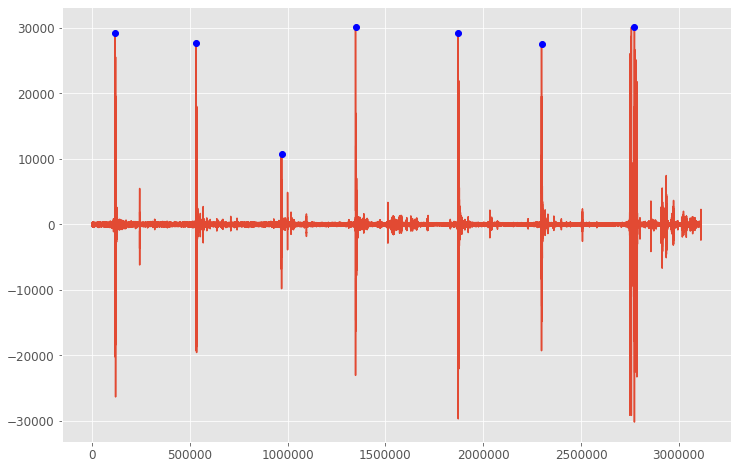

In [9]:
# Rule of thumb to find peaks
peaks, _ = find_peaks(x, height= 2*RMS(x)**2 ,distance=2*fs)
plt.plot(x)
plt.plot(peaks, x[peaks], "bo")
plt.show()

In [14]:
wavSound= np.array(x)

In [11]:
peaks

array([ 117485,  531358,  968443, 1346710, 1872157, 2298241, 2773477])

117485


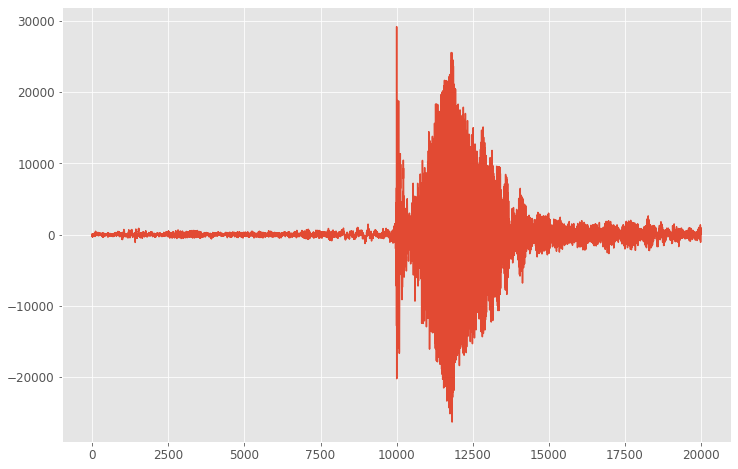

531358


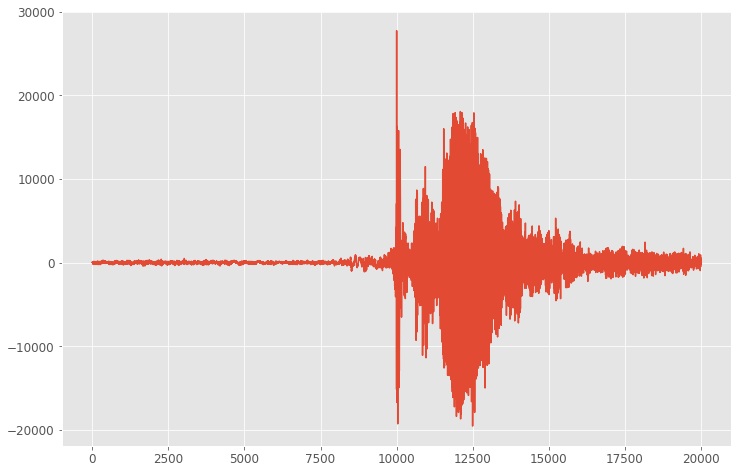

968443


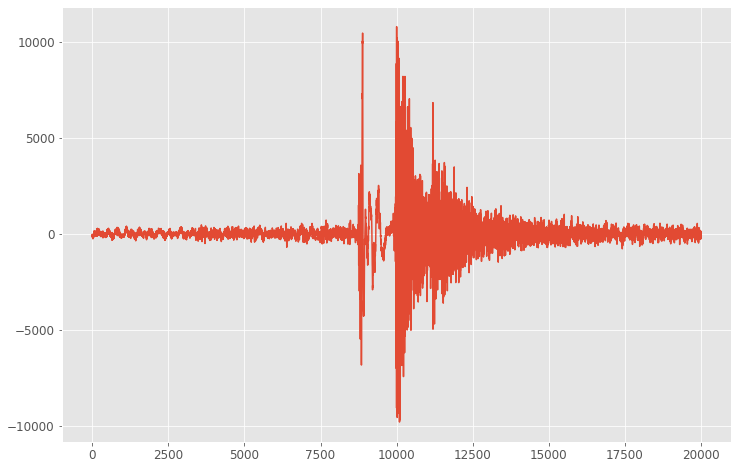

1346710


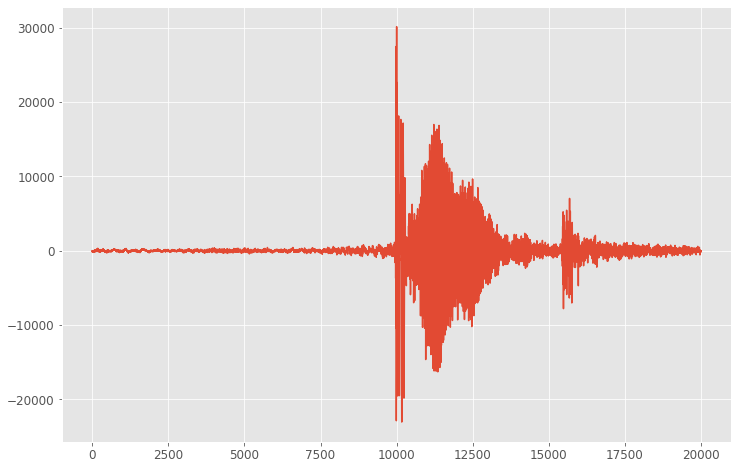

1872157


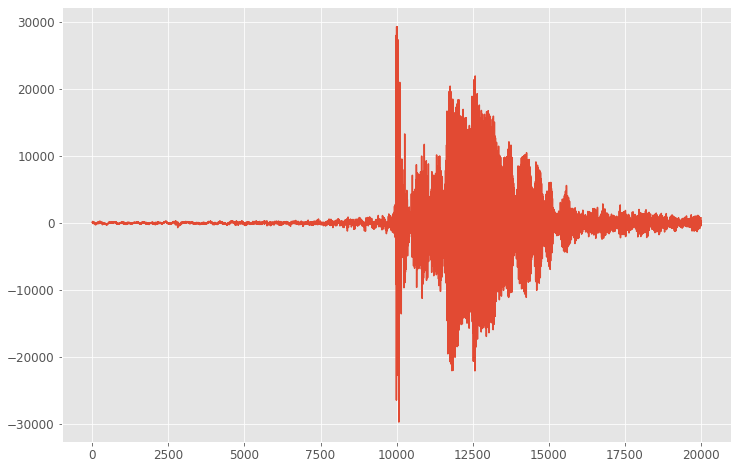

2298241


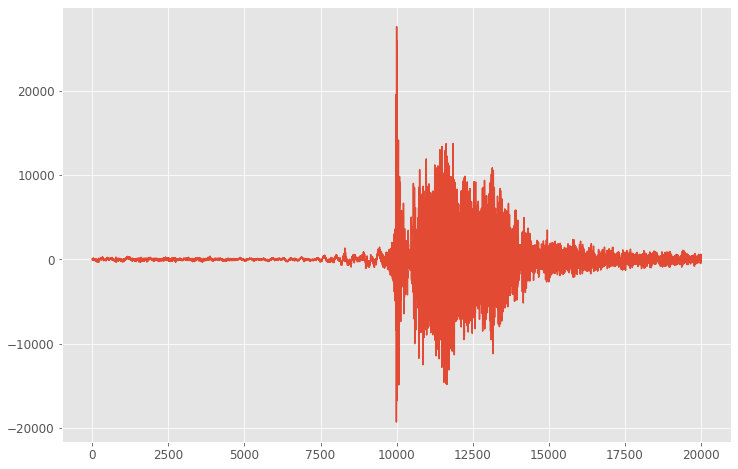

2773477


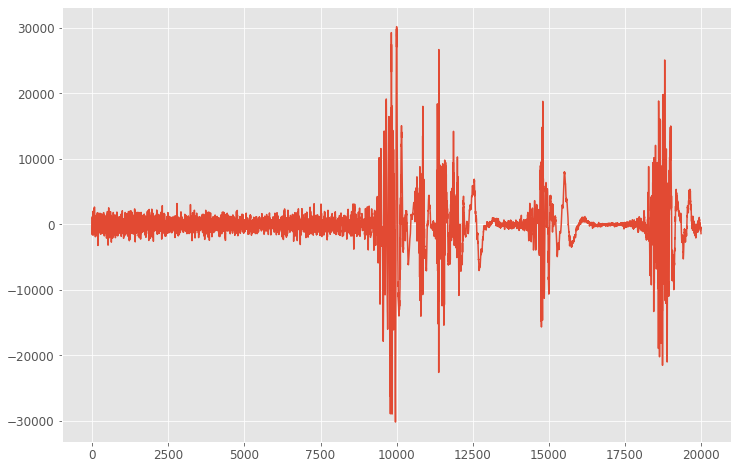

In [32]:
listSample = list()
# run through all the peaks
for peak in peaks:
  print(peak)
  # Size Win for sample
  sizewin = 20000
  # Create sample
  sample = wavSound[int((peak-(sizewin/2))):int((peak+(sizewin/2)))]
  # Append sample list
  listSample.append(sample)
  # Save wav file.
  write('example'+str(peak)+'.wav', fs, sample.astype(np.int16))
  # Plot wav sample. 
  plt.plot(sample)
  plt.show()


In [33]:
listSample

[array([ 40, 118,  -6, ..., 751, 444,  83], dtype=int16),
 array([  29,   45,   69, ..., -146,   37,  515], dtype=int16),
 array([-168, -105,  -32, ...,  -39, -102,  -79], dtype=int16),
 array([ -42, -110,  -94, ...,  -87,   16,  -89], dtype=int16),
 array([ 68,  63,  58, ..., 261, 451, 790], dtype=int16),
 array([ -37,   25,   46, ...,  297,   22, -158], dtype=int16),
 array([-1513, -1072, -1157, ..., -1004, -1148, -1394], dtype=int16)]

In [35]:
len(listSample)

7

In [51]:

listValueFeature = list()
# run all the samples.
for sample in range(len(listSample)):
  print(listSample[sample])
  # Extrate the faetures sample.
  values, featureName =  ShortTermFeatures.feature_extraction(listSample[sample], fs, sizewin, sizewin, deltas=False)
  # append list feature extract sample.
  listValueFeature.append(np.squeeze(values.T))

[ 40 118  -6 ... 751 444  83]
[  29   45   69 ... -146   37  515]
[-168 -105  -32 ...  -39 -102  -79]
[ -42 -110  -94 ...  -87   16  -89]
[ 68  63  58 ... 261 451 790]
[ -37   25   46 ...  297   22 -158]
[-1513 -1072 -1157 ... -1004 -1148 -1394]


In [53]:
# Generate dataframe Audio.
dataframeFeatureAudio = pd.DataFrame(listValueFeature,columns=featureName)

In [54]:
dataframeFeatureAudio

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std
0,0.143207,0.018021,1.161786,0.210149,0.182613,0.489390,0.0,0.1171,-22.602459,-0.067290,-0.686543,-0.820686,0.513772,-0.453442,0.052038,0.309538,-0.351679,0.425438,-0.554894,0.346882,-0.303199,0.000292,0.000167,0.000074,0.000106,0.000139,0.000173,0.009321,0.000405,0.000123,0.000218,0.000287,0.000420,0.002518
1,0.178909,0.013344,1.260811,0.227932,0.195029,0.603723,0.0,0.1190,-22.719158,-0.453954,-0.771077,-0.608948,0.546868,-0.327721,0.107419,0.256417,-0.263111,0.452528,-0.438420,0.317285,-0.247065,0.000416,0.000303,0.000192,0.000125,0.000171,0.000184,0.001909,0.000368,0.000291,0.000271,0.000240,0.000263,0.000464
2,0.228511,0.006488,1.405639,0.412305,0.254193,2.668911,0.0,0.7121,-21.728455,1.706773,-0.629117,-0.224979,0.076921,-0.066620,0.233847,0.062238,0.286672,0.280446,-0.003409,0.123787,0.010258,0.003763,0.002118,0.003960,0.001362,0.002014,0.002000,0.003534,0.003604,0.002412,0.002115,0.001859,0.001632,0.000878
3,0.149307,0.007539,1.047818,0.193687,0.177324,1.003854,0.0,0.1357,-22.554264,-0.171839,-0.928003,-1.416478,0.436051,0.061023,0.508346,0.473185,-0.439665,-0.110451,-0.100741,0.495166,-0.385335,0.000950,0.001096,0.001530,0.000579,0.000667,0.001120,0.028596,0.000681,0.000477,0.000113,0.000280,0.000423,0.007714
4,0.115506,0.017583,1.496029,0.182390,0.162303,0.595308,0.0,0.1220,-22.218110,-0.576704,-1.084822,-0.733718,0.742533,-0.646214,0.149950,0.054914,-0.213202,0.536606,-0.359670,0.512648,-0.265156,0.000185,0.000169,0.000312,0.000311,0.000278,0.000238,0.003770,0.000168,0.000182,0.000599,0.000522,0.000468,0.000966
5,0.119006,0.006281,1.390641,0.217692,0.181700,0.897541,0.0,0.1767,-23.200300,-0.961724,-0.470304,-0.085806,0.860625,-0.473155,0.146852,0.126963,-0.053414,0.402455,-0.371081,0.045999,-0.262910,0.000485,0.000491,0.000446,0.000487,0.000200,0.000456,0.009866,0.001008,0.000317,0.000617,0.000978,0.000316,0.002592
6,0.119206,0.013921,2.246293,0.200879,0.210125,0.846356,0.0,0.1447,-19.757602,1.942223,-0.242621,-0.161209,-0.036855,0.274029,-0.231844,-0.153637,-0.026546,-0.222757,-0.198554,0.165811,0.308141,0.005588,0.011298,0.017300,0.008055,0.005972,0.013287,0.006788,0.003194,0.007539,0.005142,0.009289,0.004384,0.003901


In [ ]:
# Rotular os dados com base no conhecimento de ouvir samples
# Criar o classificador 